In [1]:
import pandas as pd
from dataSplit import DataSplitter
from vectorization import Vectorizer_TFIDF
from statistic import SentimentStats
from modeleval import ModelEvaluator
import numpy as np

# Phân tích dữ liệu

In [2]:
# Đọc tập dữ liệu gốc
original_data = pd.read_csv("../dataset/new_data.csv")

In [3]:
stats = SentimentStats(original_data)

In [4]:
stats.quality_check()

Null values per column:
content    0
label      0
start      0
dtype: int64
Number of duplicate rows: 4240


{'nulls': content    0
 label      0
 start      0
 dtype: int64,
 'duplicates': np.int64(4240)}

Label distribution (%):
label
POS    63.869449
NEG    21.198626
NEU    14.931925
Name: proportion, dtype: float64


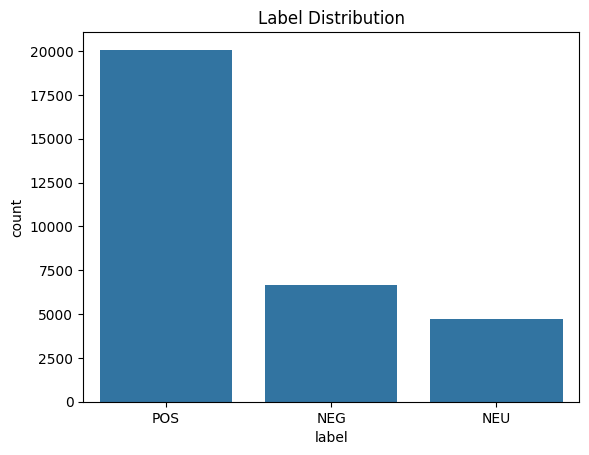

<Figure size 1000x1000 with 0 Axes>

In [5]:
stats.label_distribution()

In [6]:
# print some data have NEU label
print(original_data[original_data['label'] == 'NEU'].sample(20))

                                                 content label  start
25846   Chất lượng sp tạm được Thời gian giao hàng nhanh   NEU      3
2988                                    Mua thêm cái nữa   NEU      3
20448                 Hàg vải mỏng thấy mặc ko đứng ngực   NEU      3
2980                                        Ko dùng được   NEU      3
9226   Lưu ý cho những ai muốn đặt màu trắng (như mìn...   NEU      3
22049                                      Chất quần mềm   NEU      3
23361                       Ko pit sao con e lai bi bón😔   NEU      3
22641                                    Vừa với số tiền   NEU      3
21978                                          Nhầm size   NEU      3
24525                         Sản phẩm tốt trong tầm giá   NEU      3
25594                                Áo đẹp hơn mong đợi   NEU      3
31347   Áo chất lượng tương đối, còn mùi cao su nồng quá   NEU      3
24749                            Chất lượng sản phẩm tốt   NEU      3
23552               

- Dữ liệu mất cân bằng về nhãn
- Dữ liệu đánh label chưa hoàn toàn chính xác   
=> 
- Cân nhắc loại bỏ dữ liệu có NEU label
- Cân nhắc dùng stratified split khi chia train/test.
- Cân nhắc điều chỉnh weights trong model.


Sentence length statistics (word count):
count    31436.000000
mean        10.195699
std          8.620445
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
90%         21.000000
95%         27.000000
99%         44.000000
max         74.000000
Name: content, dtype: float64


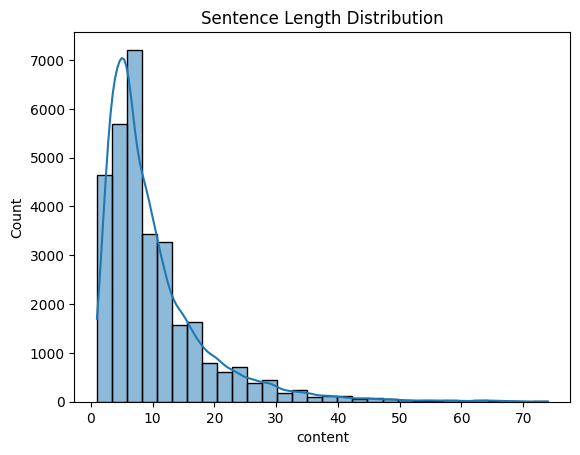

<Figure size 1000x1000 with 0 Axes>

In [7]:
stats.sentence_length_stats()

- Đa số câu khá ngắn, nhưng có outliers rất dài lên đến 74 từ.   
=> Để hạn chế noise
- Cân nhắc loại bỏ các câu quá dài
- Giới hạn tham số max_features, min_df trong hàm TF-IDF để giảm ảnh hưởng từ câu dài/ít gặp

Vocabulary size: 11419
Top 30 most common words:
[('rất', 12781), ('sản phẩm', 9028), ('đẹp', 8507), ('shop', 6748), ('hàng', 6684), ('chất lượng', 6113), ('giao', 4908), ('và', 4035), ('tuyệt vời', 3967), ('áo', 3965), ('đóng gói', 3578), ('tốt', 3390), ('nhanh', 3353), ('tiền', 3338), ('chắc chắn', 3123), ('vải', 2719), ('nhưng', 2665), ('đáng', 2622), ('thời gian', 2588), ('phục vụ', 2508), ('mình', 2034), ('hơi', 2033), ('mua', 1983), ('chất', 1883), ('màu', 1874), ('lắm', 1865), ('mặc', 1787), ('k', 1716), ('ko', 1645), ('được', 1619)]


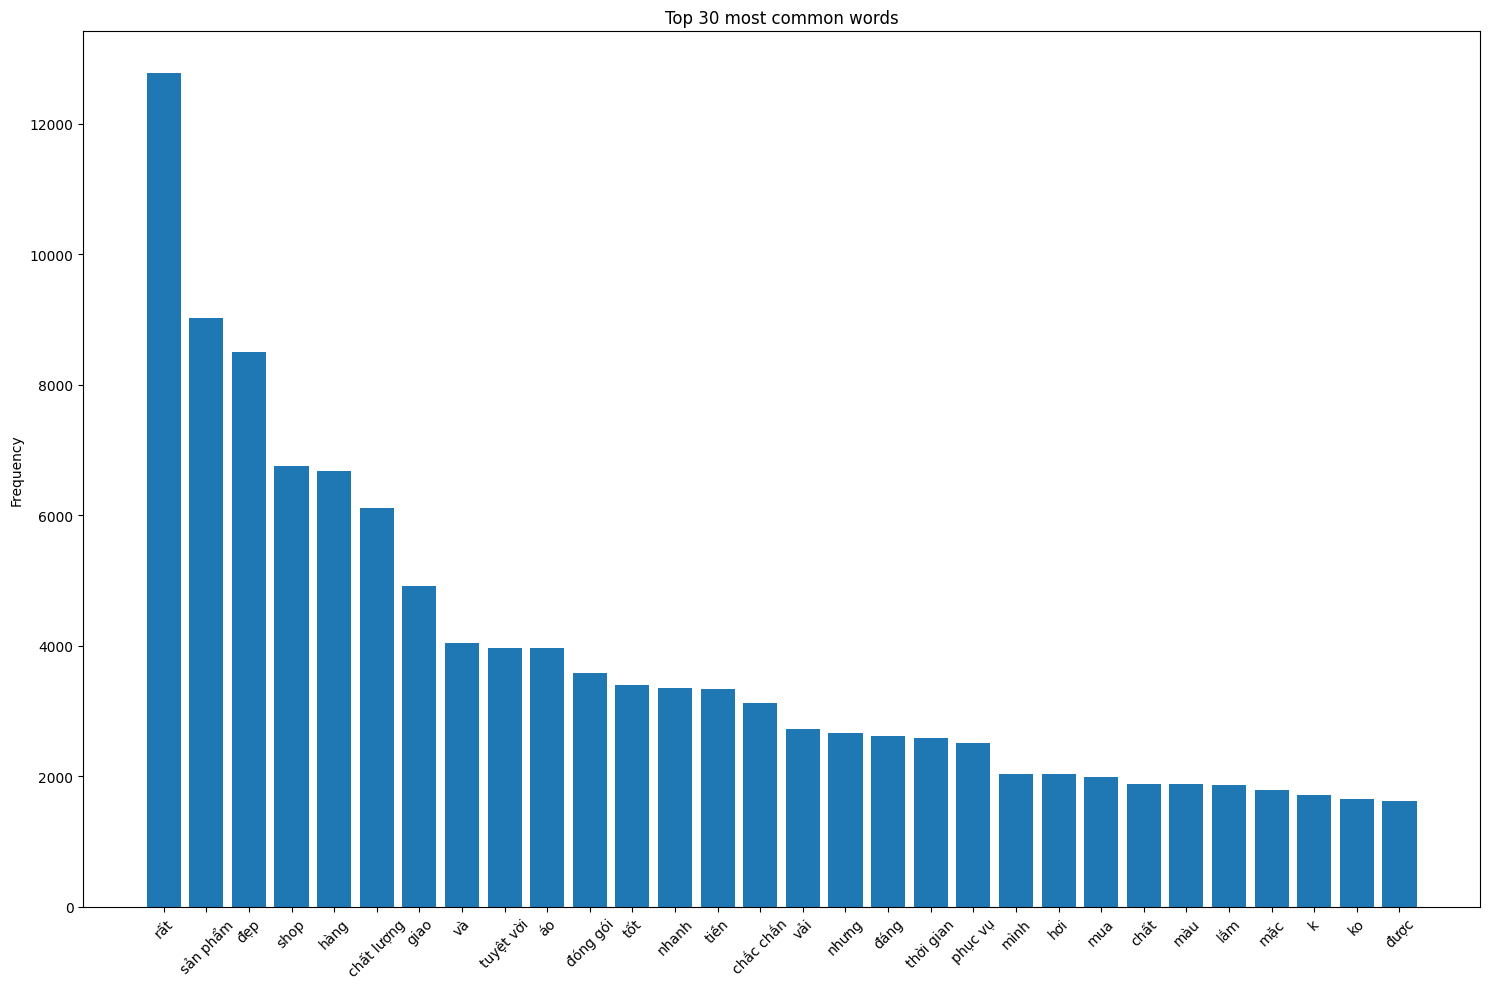

In [8]:
stats.vocab_stats(top_n=30)

Stopwords ratio: 38.88%
Top 30 most common stopwords:
rất: 12781
và: 4035
tốt: 3390
nhanh: 3353
chắc chắn: 3123
nhưng: 2665
đáng: 2622
thời gian: 2588
mình: 2034
được: 1619
có: 1617
quá: 1613
thì: 1589
không: 1574
với: 1473
mà: 1437
như: 1426
là: 1379
cho: 1253
bị: 1234
nên: 1140
sẽ: 1121
ạ: 1026
cũng: 1013
lại: 1008
luôn: 1000
hơn: 944
giống: 854
cái: 828
lần: 800


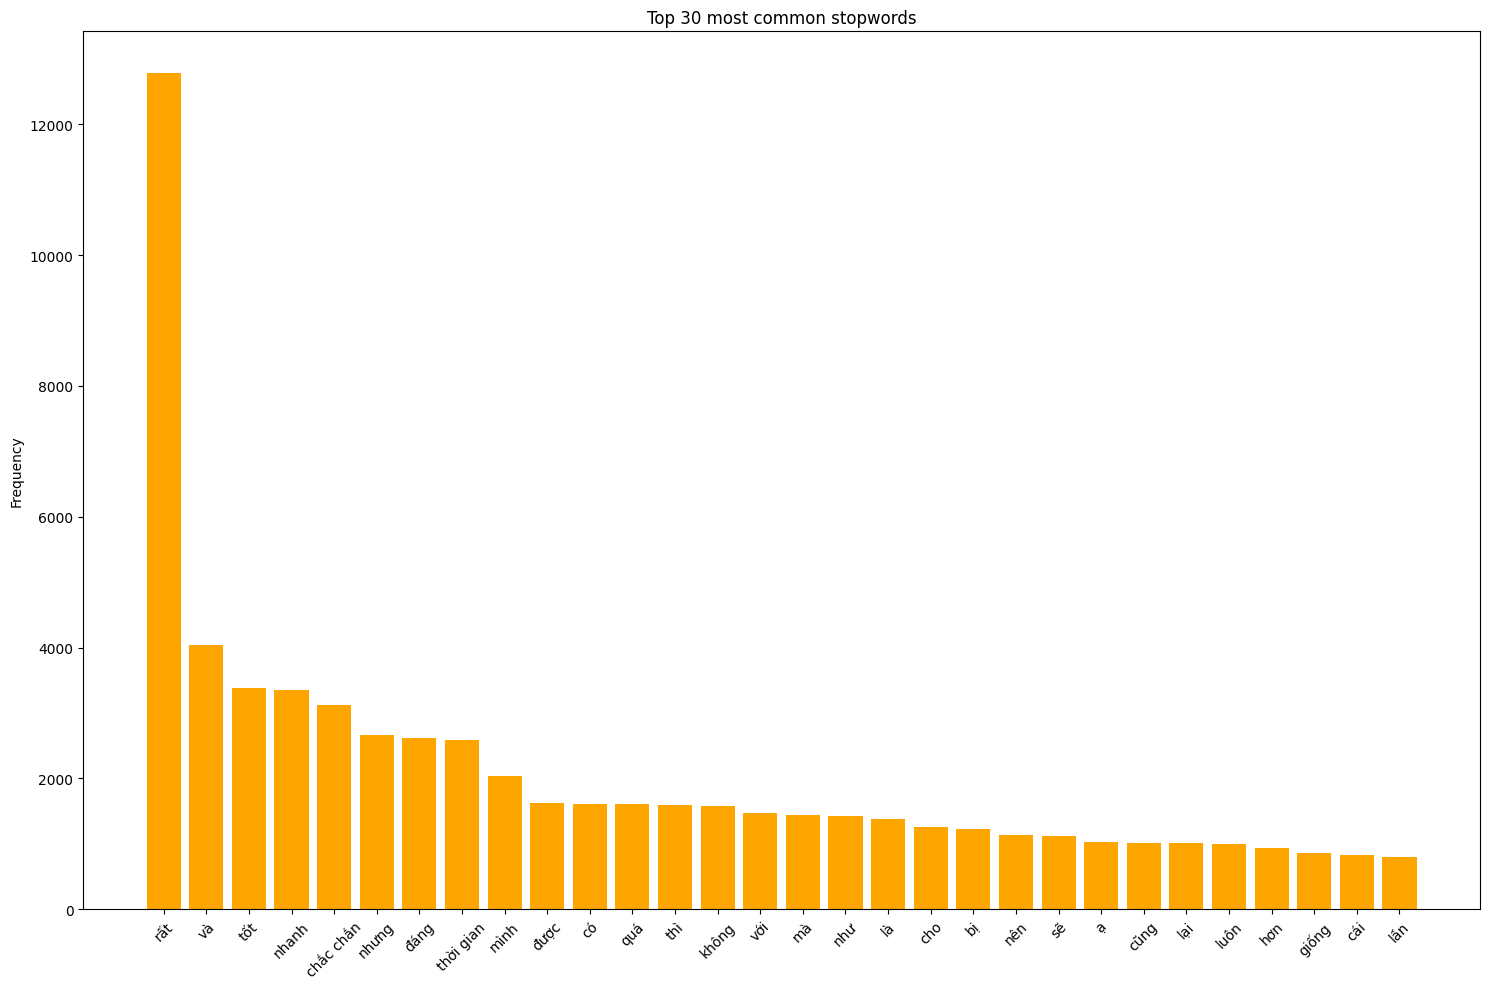

In [9]:
stats.stopword_ratio(top_n=30)

# Tiền xử lý và thống kê dữ liệu được xử lý

In [2]:
df_nostopwords = pd.read_csv("../dataset/data_preprocessed_no-stopwords.csv")
df_stopwords = pd.read_csv("../dataset/data_preprocessed_stopwords.csv")

In [3]:
df_nostopwords = df_nostopwords.dropna()
df_stopwords = df_stopwords.dropna()


In [4]:
stats = SentimentStats(df_nostopwords)

Label distribution (%):
label
1    74.693764
0    25.306236
Name: proportion, dtype: float64


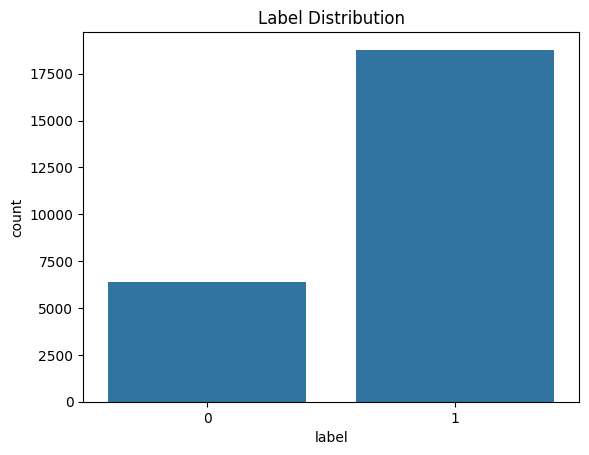

<Figure size 1000x1000 with 0 Axes>

In [13]:
stats.label_distribution()

Sentence length statistics (word count):
count    25144.000000
mean         4.754136
std          2.969894
min          1.000000
25%          3.000000
50%          4.000000
75%          6.000000
90%          9.000000
95%         11.000000
99%         14.000000
max         24.000000
Name: content, dtype: float64


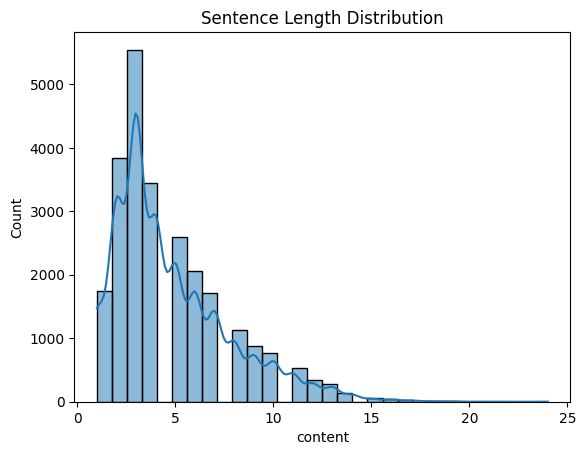

<Figure size 1000x1000 with 0 Axes>

In [14]:
stats.sentence_length_stats()

Vocabulary size: 8083
Top 30 most common words:
[('đẹp', 6637), ('sản_phẩm', 6134), ('hàng', 5003), ('shop', 5003), ('chất_lượng', 4382), ('tốt', 3597), ('giao', 3509), ('áo', 3151), ('tuyệt_vời', 2762), ('nhanh', 2422), ('đóng_gói', 2262), ('tiền', 2141), ('vải', 2124), ('chắc_chắn', 1919), ('phục_vụ', 1567), ('chất', 1552), ('lắm', 1542), ('mua', 1413), ('màu', 1322), ('mặc', 1321), ('hơi', 1313), ('giá', 1091), ('ủng_hộ', 840), ('nhiệt_tình', 704), ('hình', 699), ('mỏng', 632), ('kém', 631), ('size', 619), ('sp', 592), ('vừa', 585)]


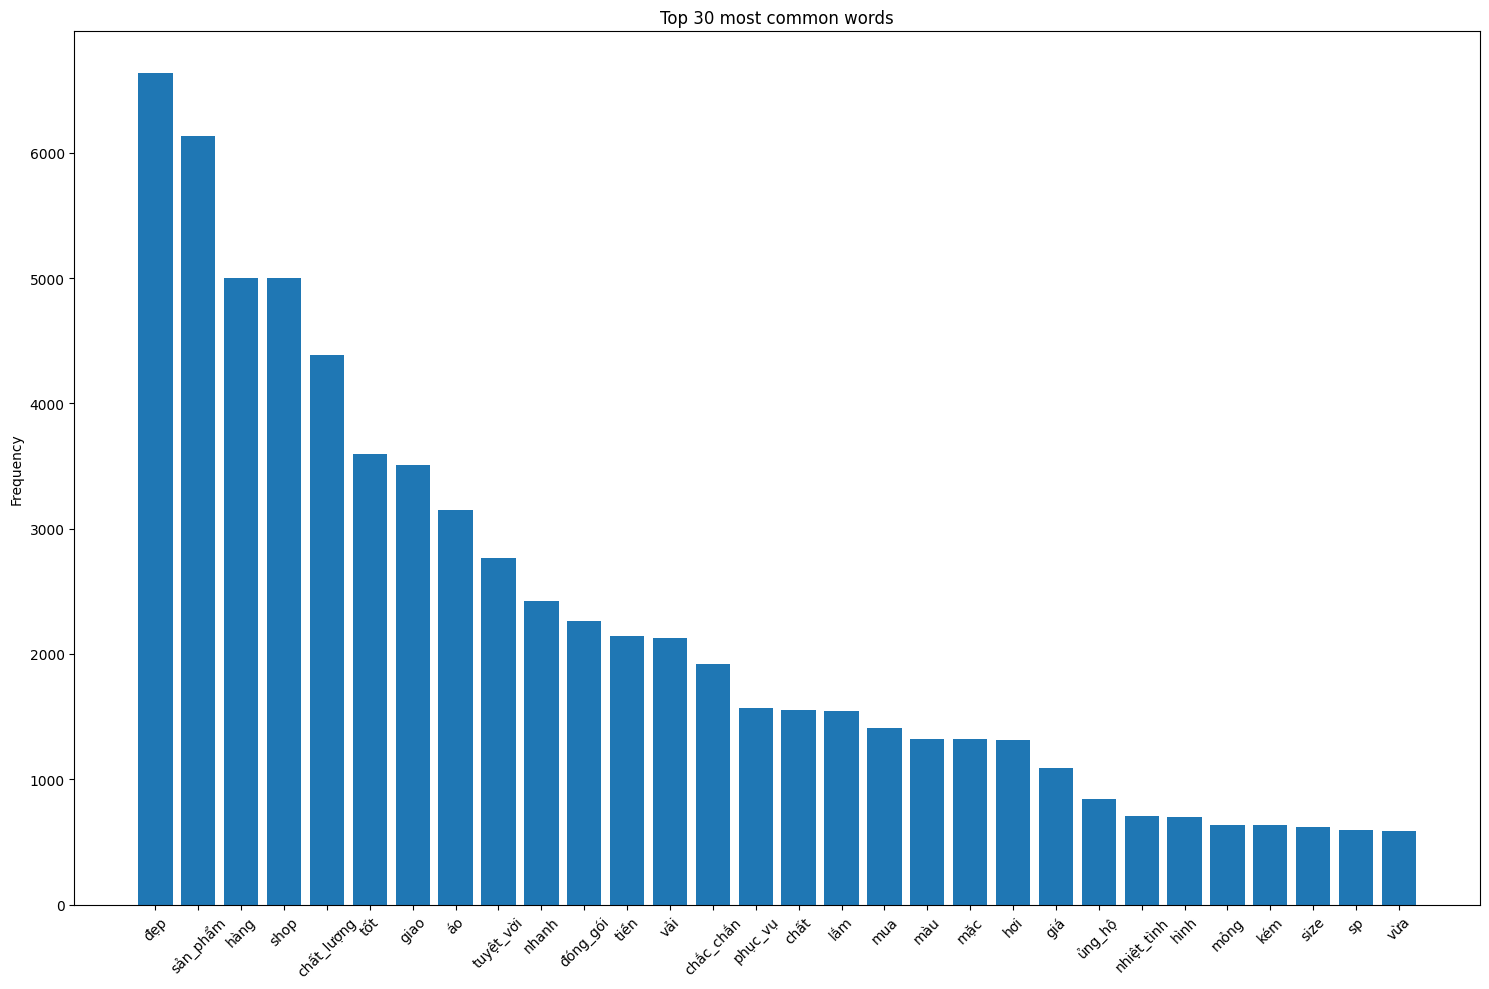

In [15]:
stats.vocab_stats(top_n=30, is_precessed=True)

Stopwords ratio: 7.29%
Top 30 most common stopwords:
tốt: 3597
nhanh: 2422
vừa: 585
đúng: 520
thích: 511
nhỏ: 344
chắc: 125
dễ: 117
hay: 75
ý: 59
giống: 49
khó: 49
dài: 37
sao: 16
không: 12
tay: 10
đáng: 10
lâu: 8
lên: 8
mình: 8
ạ: 8
tin: 7
bán: 7
mạnh: 6
như: 6
ăn: 5
lòng: 5
là: 5
cao: 4
bộ: 4


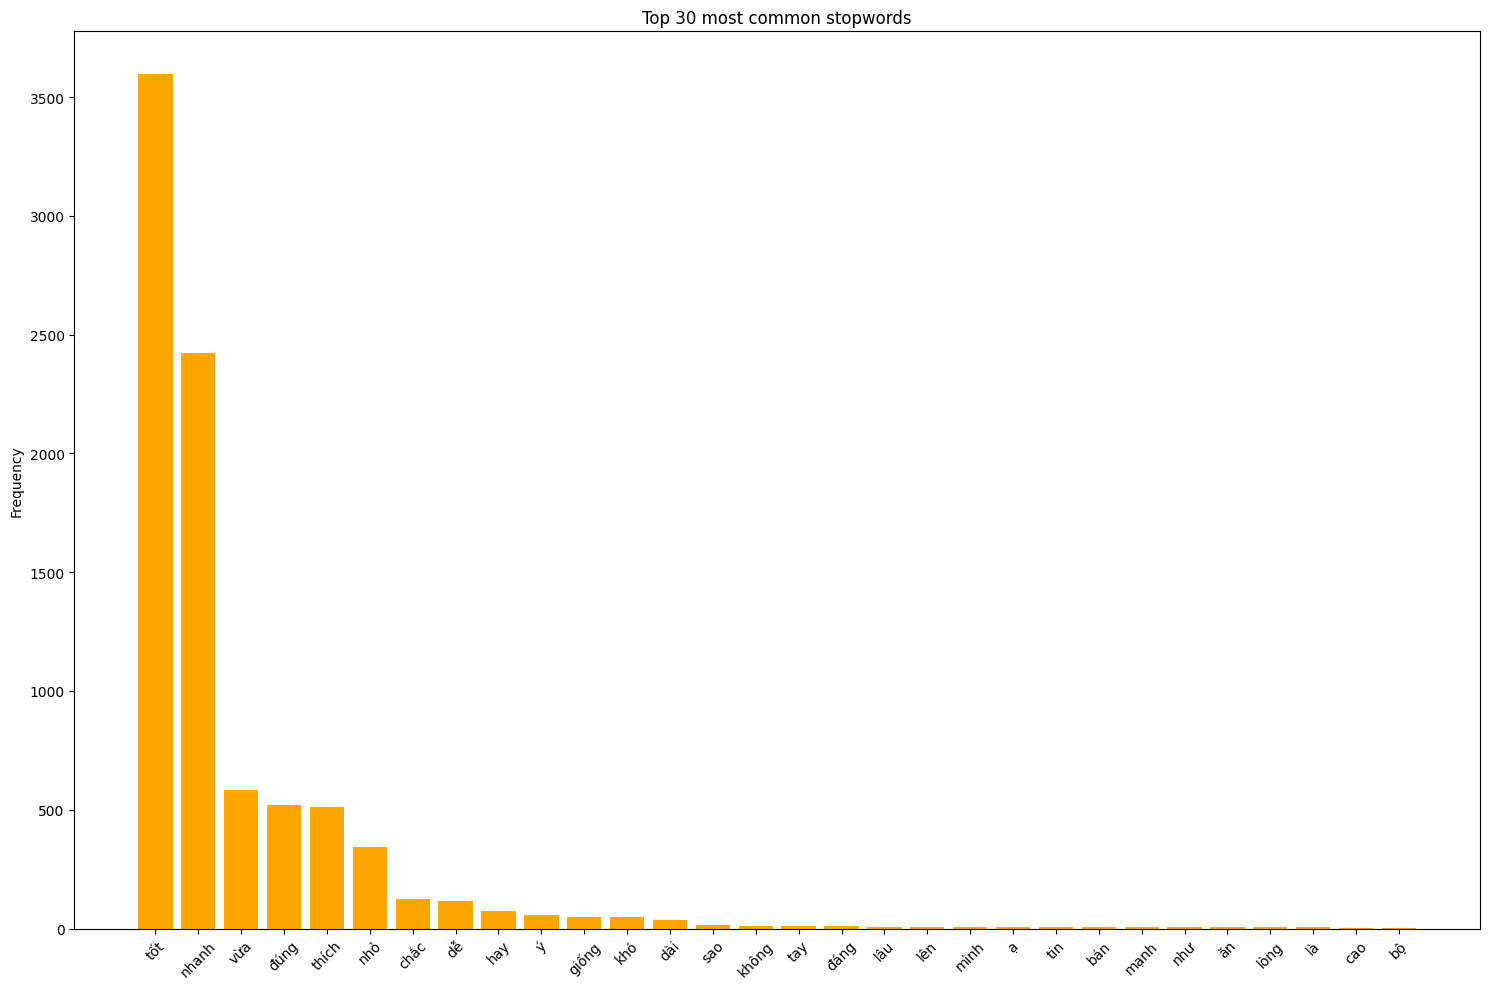

In [16]:
stats.stopword_ratio(top_n=30, is_precessed=True)

# Chia tập train/test

In [4]:
data = DataSplitter(df_nostopwords, text_col="content", label_col="label")

# Huấn luyện và so sánh metric

In [5]:
evaluator = ModelEvaluator()

In [6]:
# Vector hóa dữ liệu
vectorizer = Vectorizer_TFIDF(ngram_range=(1,2), min_df=2, max_features=30000)

# 1. So sánh metrics dựa trên cách chia tập dữ liệu

## 1.1 Chia theo stratifed

=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 1118)
Số features: 1118
Training SVM...
Training Naive Bayes...
Training Random Forest...
Training Logistic Regression...


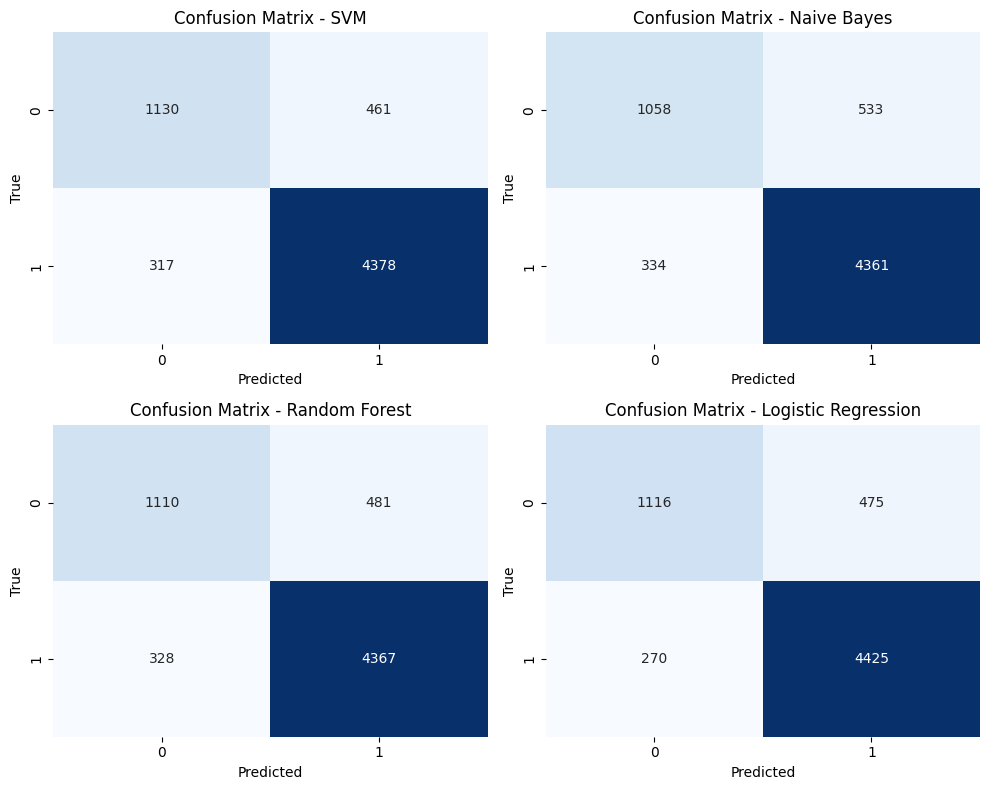

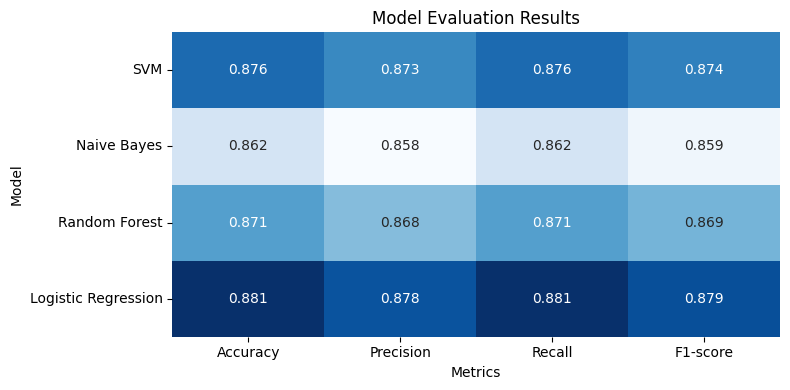

In [7]:
evaluator.evaluate_with_vectorizer(
        data, 
        vectorizer,
        split_type="stratified",
        show_cm=True,
        show_vectorizer_info=True
    )

## 1.2 Holdout

=== Using Holdout Split ===
Kích thước ma trận TF-IDF: (18858, 1108)
Số features: 1108
Training SVM...
Training Naive Bayes...
Training Random Forest...
Training Logistic Regression...


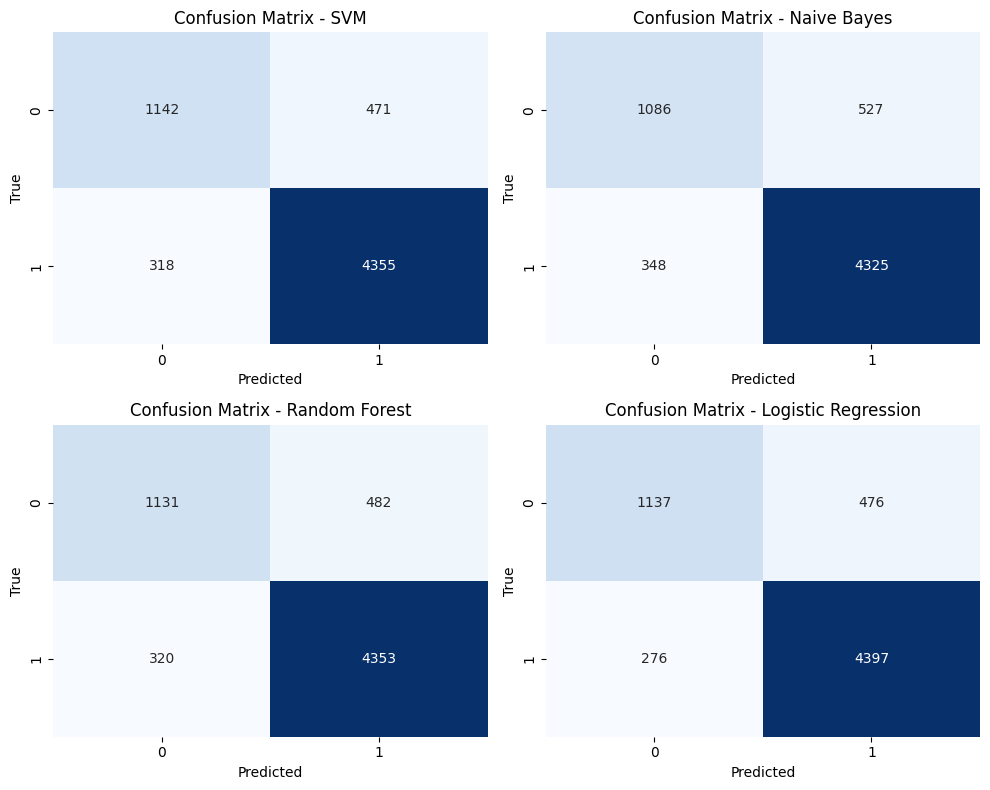

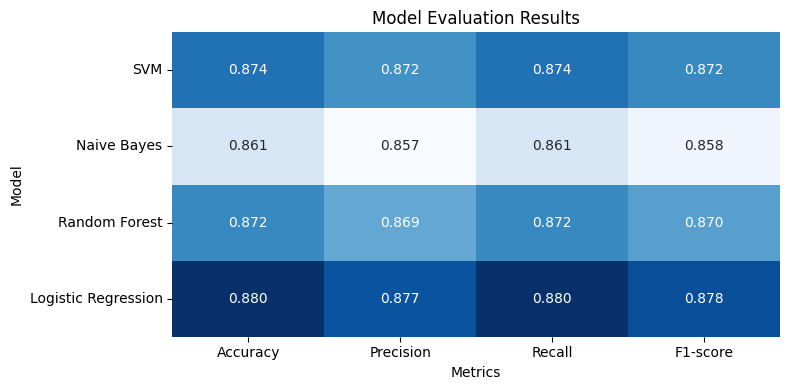

In [8]:
eval_holdout = evaluator.evaluate_with_vectorizer(
        data, 
        vectorizer,
        split_type="holdout",
        show_cm=True,
        show_vectorizer_info=True
    )

# 2. So sánh metric khi thay đổi tham số df

=== Evaluating with min_df=2 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 7113)
=== Evaluating with min_df=5 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 2459)
=== Evaluating with min_df=8 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 1505)
=== Evaluating with min_df=11 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 1118)
=== Evaluating with min_df=14 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 888)
=== Evaluating with min_df=17 ===
=== Using Stratified Split ===
Kích thước ma trận TF-IDF: (18858, 743)


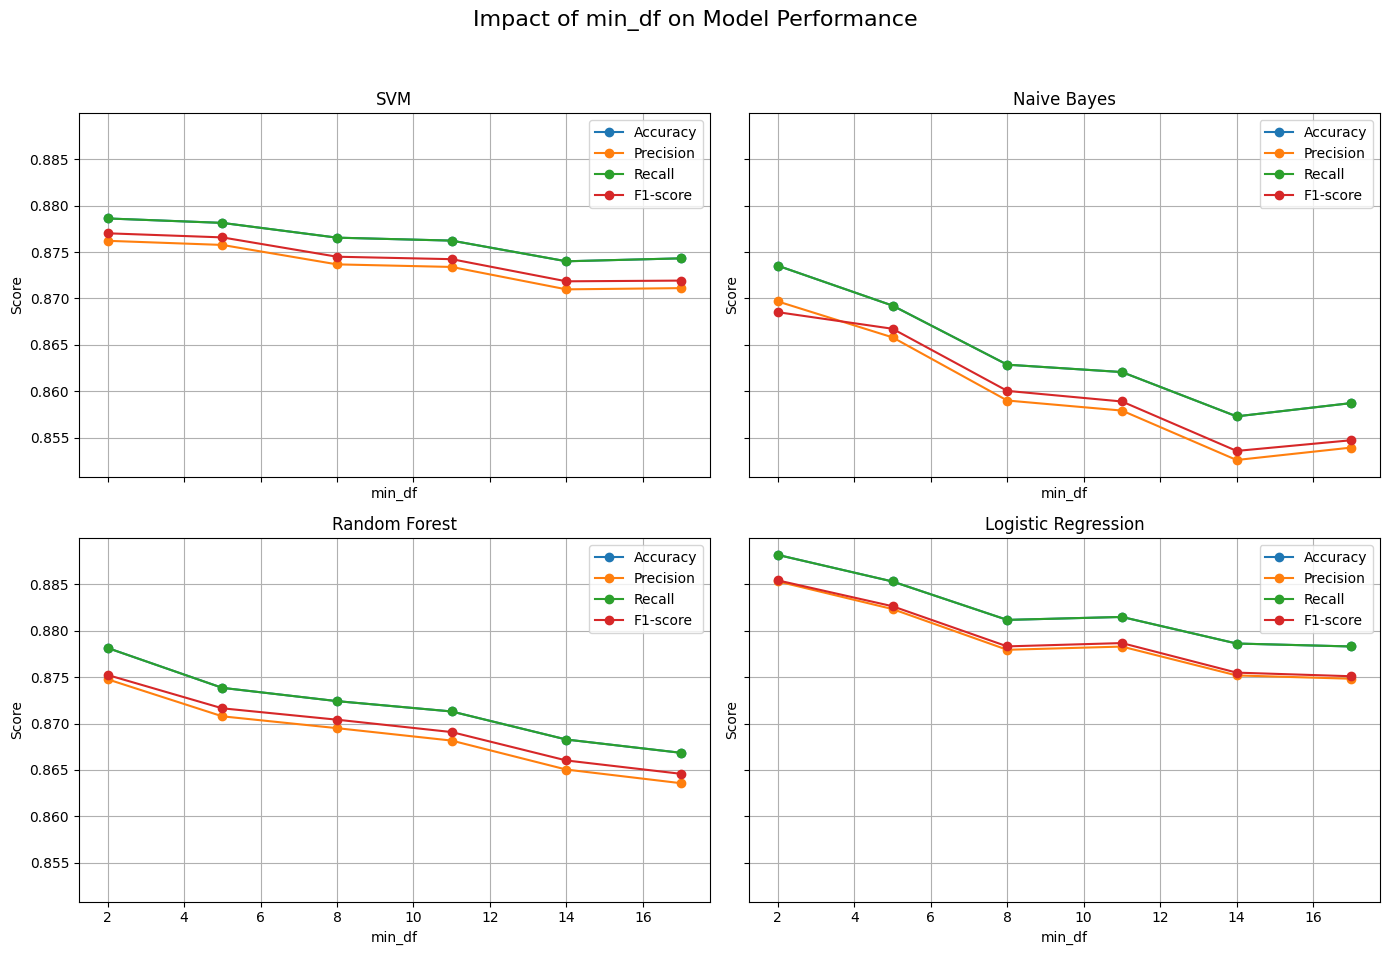

{'SVM': [[2,
   np.float64(0.878619153674833),
   np.float64(0.876212230266585),
   np.float64(0.878619153674833),
   np.float64(0.8770207900627114)],
  [5,
   np.float64(0.8781419026407891),
   np.float64(0.8757673894958649),
   np.float64(0.8781419026407891),
   np.float64(0.8765802001844006)],
  [8,
   np.float64(0.8765510658606427),
   np.float64(0.8736737819555211),
   np.float64(0.8765510658606427),
   np.float64(0.8744978873867529)],
  [11,
   np.float64(0.8762328985046134),
   np.float64(0.8733967369790095),
   np.float64(0.8762328985046134),
   np.float64(0.8742343218235537)],
  [14,
   np.float64(0.8740057270124085),
   np.float64(0.8709832138342479),
   np.float64(0.8740057270124085),
   np.float64(0.871848992200504)],
  [17,
   np.float64(0.8743238943684378),
   np.float64(0.8711153379719012),
   np.float64(0.8743238943684378),
   np.float64(0.8719258069135054)]],
 'Naive Bayes': [[2,
   np.float64(0.8735284759783646),
   np.float64(0.869679634193007),
   np.float64(0.87352

In [7]:
evaluator.evaluate_with_min_df(data, min_df_values=range(2, 20, 3), max_features=30000)

# 3. Thay đổi tham số mô hình

## 3.1 So sánh metric mô hình khi thay đổi tham số.

In [8]:
X_train = vectorizer.fit_transform(data.strat_X_train)
X_test = vectorizer.transform(data.strat_X_test)
y_train = data.strat_y_train
y_test = data.strat_y_test

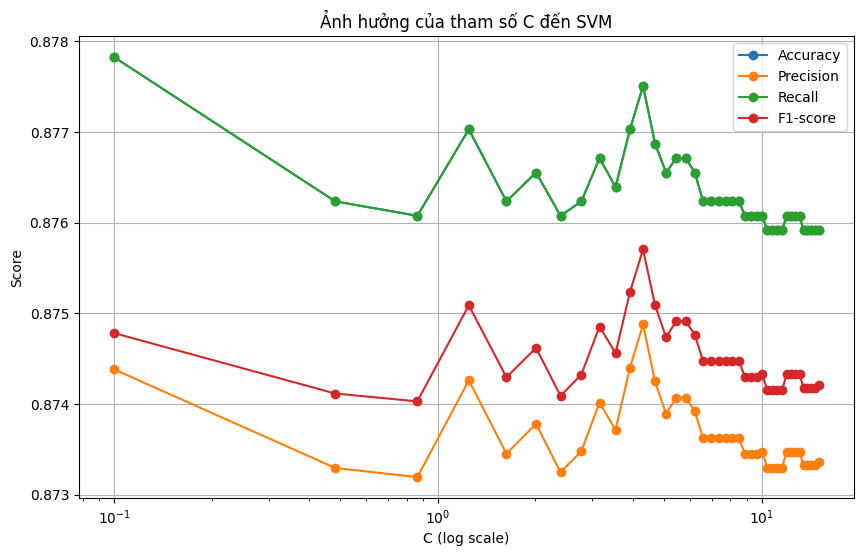

Best C: 4.302564102564102
Best F1-score: 0.8757039164762492


In [ ]:
# SVM
import numpy as np
C_values = np.linspace(0.1, 15, 100)
svm_eval = evaluator.track_C_performance(X_train, y_train, X_test , y_test, C_values, model_type="svm")

best_idx = svm_eval["F1-score"].idxmax()
best_row = svm_eval.loc[best_idx]

best_C = best_row["C"]
best_f1 = best_row["F1-score"]

print("Best C:", best_C)
print("Best F1-score:", best_f1)

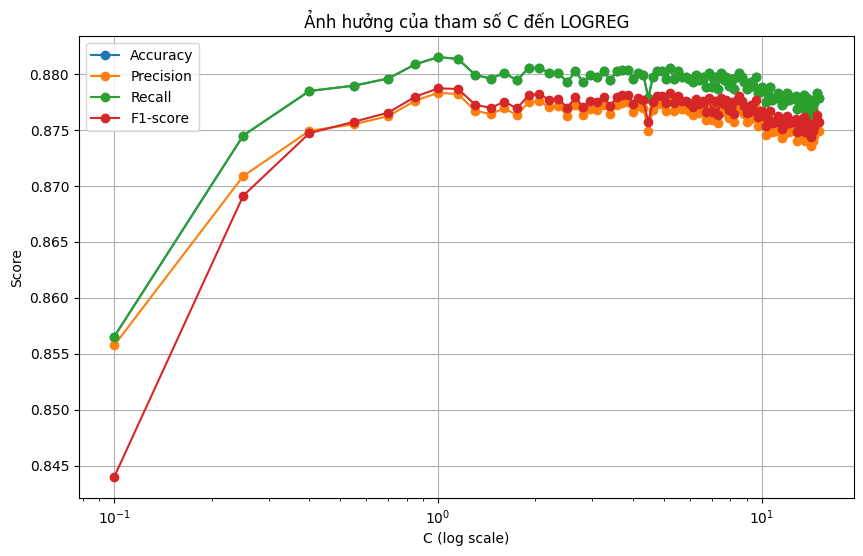

Best C: 1.0030303030303032
Best F1-score: 0.8786985448083625


In [ ]:

C_values = np.linspace(0.1, 15, 100)
logreg_eval = evaluator.track_C_performance(X_train, y_train, X_test , y_test, C_values, model_type="logreg")

best_idx = logreg_eval["F1-score"].idxmax()
best_row = logreg_eval.loc[best_idx]

best_C = best_row["C"]
best_f1 = best_row["F1-score"]

print("Best C:", best_C)
print("Best F1-score:", best_f1)

In [ ]:
# Random forest
rf_eval = evaluator.track_rf_hyperparams(X_train, y_train, X_test, y_test,
                         n_estimators_list=[20, 40, 60, 80, 100])

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 20 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=20).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 30 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the num

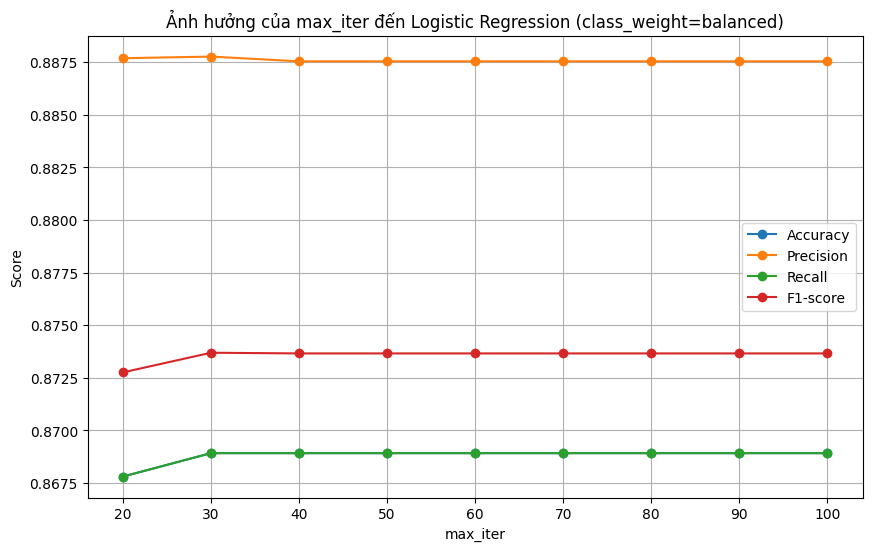

In [17]:
# Logistic regression
max_iters=[i for i in range(20,110,10)]
logreg_eval = evaluator.track_logreg_performance(X_train, y_train, X_test, y_test,
                                 max_iters=max_iters)

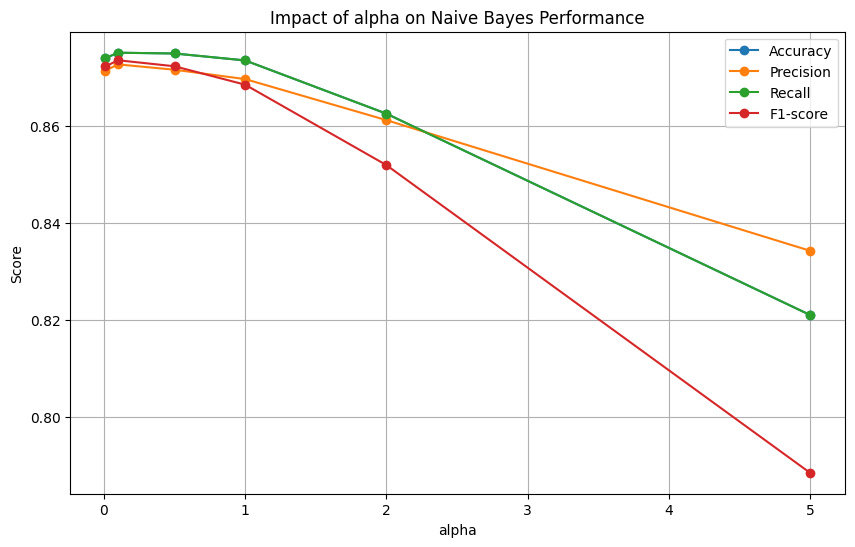

In [9]:
# Bayes
bayes_eval = evaluator.track_nb_alpha(X_train, y_train, X_test, y_test, alpha_list=[0.01, 0.1, 0.5, 1.0, 2.0, 5.0])

# 4. Đánh giá độ ổn định mô hình

=== Using Stratified K-Fold Cross Validation ===


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 35 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=35).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 35 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the num

summary: 



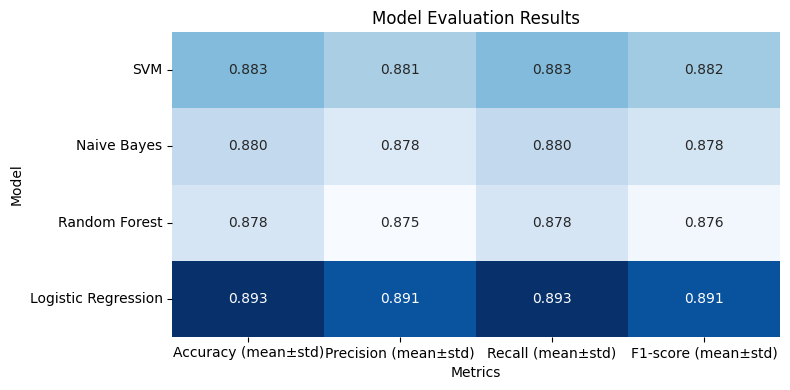

In [7]:
evaluator = ModelEvaluator(models="optimize")

eval_combine = evaluator.evaluate_with_vectorizer(
        data, 
        vectorizer,
        split_type="stratified_kfold",
        show_cm=True,
        show_vectorizer_info=False,
        show_metric=True
    )

# 5. Xuất mô hình

=== Using Stratified Split ===


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 35 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=35).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


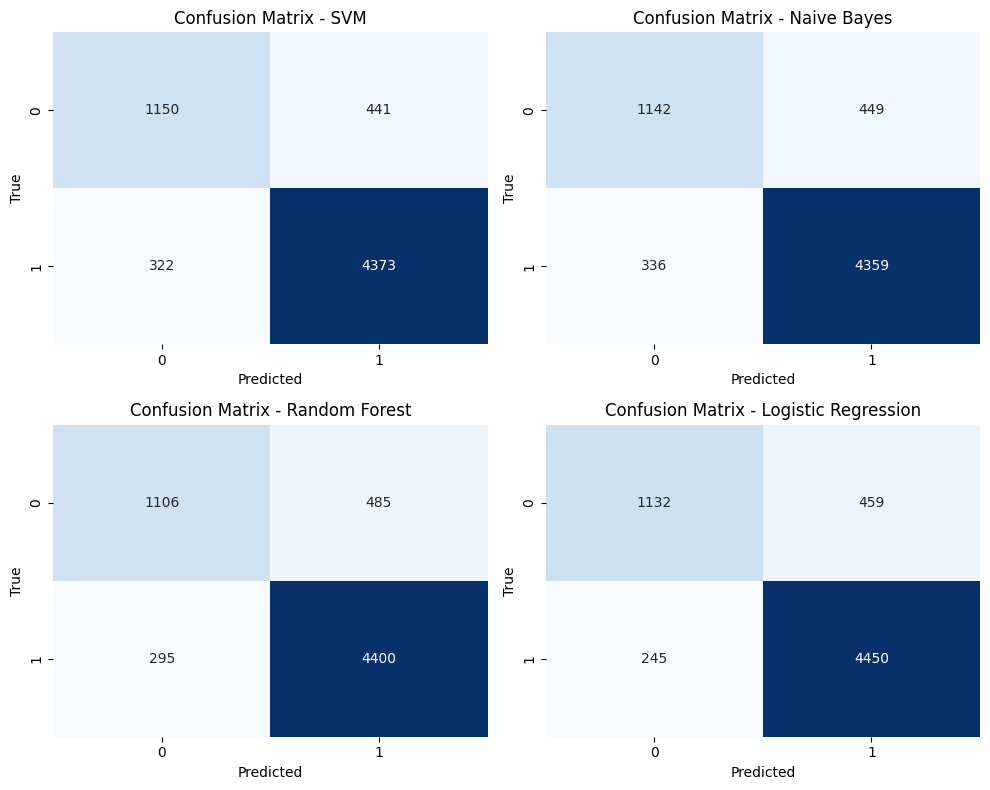

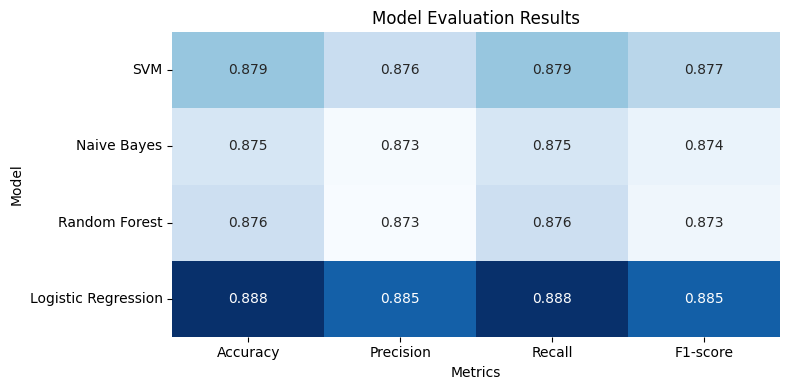

In [7]:
evaluator = ModelEvaluator(models="optimize")

eval_combine = evaluator.evaluate_with_vectorizer(
        data, 
        vectorizer,
        split_type="stratified",
        show_cm=True,
        show_vectorizer_info=False,
        show_metric=True
    )

In [8]:
import joblib
best_model = evaluator.trained_models['Logistic Regression']
vectorizer = evaluator.vectorizer
print(best_model)
print(vectorizer)


joblib.dump(best_model, "../model/best.pkl")
joblib.dump(vectorizer, "../model/vectorizer.pkl")


LogisticRegression(max_iter=35, random_state=42)


['../model/vectorizer.pkl']

=== Using Stratified Split ===


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 35 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=35).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
